<a href="https://colab.research.google.com/github/anilvce/mathslab/blob/main/Exp_6_MatrixDecompositions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### solve system of linear equations:
x+2y = 5
3x+4y = 7
Ax = b

x = Ainv.dot(b)

###### SVD: Singular value Decomposition(or factorization) of a Matrix

In [ ]:
import numpy as np
from scipy import linalg

m = 4
n = 4

A = np.random.randint(100, size=(m,n))
print(A)
lam, V = linalg.eig(A)
print(lam)
print(V)

[[57 22 45 11]
 [26 84 47  0]
 [27 44 25 32]
 [10 51 63  4]]
[140.96680271+0.j         -33.76180003+0.j
  31.39749866+6.12798716j  31.39749866-6.12798716j]
[[ 0.46444385+0.j          0.17492047+0.j         -0.77072148+0.j
  -0.77072148-0.j        ]
 [ 0.59335982+0.j          0.21447308+0.j          0.15219943+0.13410252j
   0.15219943-0.13410252j]
 [ 0.4622611 +0.j         -0.63414188+0.j          0.23852999-0.13024366j
   0.23852999+0.13024366j]
 [ 0.46747268+0.j          0.72198906+0.j          0.513651  -0.16475112j
   0.513651  +0.16475112j]]


In [ ]:
#help(linalg.svd)
#genralization of EigenDecomposition - works for any matrix of m*n shape ;  A = UsV
A=np.array([[2,2],[1,1]])
U, s, V = linalg.svd(A)
print(U)
print(s)
print(V)
print("multi U",U.shape, U.dot(U))
print("s=",s.shape,s)
print("multi V",V.shape, V.dot(V))
print("A=", U.dot(s).dot(V))

[[-0.89442719 -0.4472136 ]
 [-0.4472136   0.89442719]]
[3.16227766 0.        ]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
multi U (2, 2) [[ 1.00000000e+00 -2.43158597e-17]
 [-2.43158597e-17  1.00000000e+00]]
s= (2,) [3.16227766 0.        ]
multi V (2, 2) [[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]
A= [3. 1.]


In [ ]:
sigma = np.zeros((m, n))
sigmainv = np.zeros((m, n))
for i in range(min(m, n)):
    sigma[i, i] = s[i]
    sigmainv[i,i] = 1/s[i]
    
A1 = np.dot(U, np.dot(sigma, V))
print(A)
print(A1)
print(sigma)
print(sigmainv)

[[28 82 71 93]
 [80 39  4 92]
 [71 59 75 38]
 [86 55 98 86]]
[[28. 82. 71. 93.]
 [80. 39.  4. 92.]
 [71. 59. 75. 38.]
 [86. 55. 98. 86.]]
[[268.68442519   0.           0.           0.        ]
 [  0.          70.8340234    0.           0.        ]
 [  0.           0.          54.09113766   0.        ]
 [  0.           0.           0.          21.82589327]]
[[0.00372184 0.         0.         0.        ]
 [0.         0.01411751 0.         0.        ]
 [0.         0.         0.01848732 0.        ]
 [0.         0.         0.         0.04581714]]


In [ ]:
# Verify U,V matrices are orthogonal
#U(U.transpose) = I; V(V.transpose) = I - means U, V orthogonal represents rotation & reflection
print("U(U.transpose)=\n{}".format(U.dot(U.transpose())))
print("V(V.transpose)=\n{}".format(V.dot(V.transpose())))

U(U.transpose)=
[[1.00000000e+00 4.46556167e-16 5.86748493e-16 1.97698197e-16]
 [4.46556167e-16 1.00000000e+00 4.33526340e-16 1.47787471e-16]
 [5.86748493e-16 4.33526340e-16 1.00000000e+00 1.07838093e-16]
 [1.97698197e-16 1.47787471e-16 1.07838093e-16 1.00000000e+00]]
V(V.transpose)=
[[ 1.00000000e+00 -4.40693757e-17 -1.24488813e-16 -1.40144299e-16]
 [-4.40693757e-17  1.00000000e+00  4.96232664e-16 -4.32704398e-18]
 [-1.24488813e-16  4.96232664e-16  1.00000000e+00  8.55723150e-17]
 [-1.40144299e-16 -4.32704398e-18  8.55723150e-17  1.00000000e+00]]


In [ ]:
#inv is easy for orthogonals U-inv = U.transpose
Uinv_ortho = U.transpose()
Uinv = linalg.pinv(U)
print(Uinv_ortho)
print(Uinv)

[[-0.5128713  -0.41361687 -0.44275104 -0.60815757]
 [ 0.19981509 -0.89614636  0.34962047  0.18644347]
 [ 0.82733753 -0.06015567 -0.45242466 -0.32742301]
 [-0.11202487 -0.14907744 -0.69068732  0.69869691]]
[[-0.5128713  -0.41361687 -0.44275104 -0.60815757]
 [ 0.19981509 -0.89614636  0.34962047  0.18644347]
 [ 0.82733753 -0.06015567 -0.45242466 -0.32742301]
 [-0.11202487 -0.14907744 -0.69068732  0.69869691]]


In [ ]:
#A = UsV; A.inv = (V.T)(s.inv)(U.T)
Ainv_svd =  ((V.transpose()).dot(sigmainv)).dot(U.transpose())

Ainv = linalg.pinv(A)
print(Ainv)
print(Ainv_svd)

print(A.dot(Ainv))
print(A.dot(Ainv_svd))

[[-0.01098503  0.0073777   0.01134864 -0.00102777]
 [ 0.01128064  0.00346817  0.02348059 -0.02628411]
 [-0.00091193 -0.01147722 -0.00596975  0.01590191]
 [ 0.00480984  0.00348299 -0.01956256  0.01134451]]
[[-0.01098503  0.0073777   0.01134864 -0.00102777]
 [ 0.01128064  0.00346817  0.02348059 -0.02628411]
 [-0.00091193 -0.01147722 -0.00596975  0.01590191]
 [ 0.00480984  0.00348299 -0.01956256  0.01134451]]
[[ 1.00000000e+00  7.35522754e-16  5.68989300e-16 -8.70831185e-16]
 [ 2.08166817e-16  1.00000000e+00  1.05471187e-15 -4.57966998e-16]
 [ 3.26128013e-16  6.38378239e-16  1.00000000e+00  1.31838984e-16]
 [ 7.42461648e-16  1.94289029e-16  1.94289029e-16  1.00000000e+00]]
[[ 1.00000000e+00  3.87277016e-16  1.11369247e-15 -6.48786580e-16]
 [-7.97972799e-17  1.00000000e+00  1.15185639e-15 -4.57966998e-16]
 [-5.20417043e-18  1.83013327e-16  1.00000000e+00  1.31838984e-16]
 [ 2.02962647e-16 -1.56992475e-16  4.85722573e-17  1.00000000e+00]]


In [ ]:
#x+2y = 5 3x+4y = 7 Ax = b
#x = Ainv.dot(b)
A= np.array([[1,2], [3,4]])
b= np.array([5,7])
x= linalg.inv(A).dot(b)
print(x)
print(A.dot(x))

[-3.  4.]
[5. 7.]


In [ ]:
x= linalg.pinv(A).dot(b)
print(x)
print(A.dot(x))

[-3.  4.]
[5. 7.]


In [ ]:
#x+2y = 5 3x+4y = 7  5x+11y=21  Ax = b
A= np.array([[1,2], [3,4], [5,11]])
b= np.array([5,7,21])
x= linalg.pinv(A).dot(b)
print(x)
print(A.dot(x))

[-0.51724138  2.16091954]
[ 3.8045977   7.09195402 21.18390805]


###### QR Decompostion

In [ ]:
#help(linalg.qr)
#QR Decomposition - works for any matrix of m*n shape A = QR
# https://atozmath.com/example/MatrixEv.aspx?he=e&q=qrdecompgs
A = np.random.randint(100, size=(4,3))
Q, R = linalg.qr(A)
print(Q)
print(R)

[[-0.68549465  0.31183315  0.30691354  0.58194609]
 [-0.69588093 -0.02347815 -0.26733946 -0.6661292 ]
 [-0.16618052 -0.57167744 -0.65977848  0.45854259]
 [-0.13502167 -0.75854714  0.63168509 -0.0857282 ]]
[[-96.28083922 -78.94613364 -75.69522721]
 [  0.         -45.27149194 -65.65178988]
 [  0.           0.         -66.52123768]
 [  0.           0.           0.        ]]


###### LU Decompostion

In [ ]:
#help(linalg.lu)
#QR Decomposition - works for any matrix of m*n shape A = LU
P, L, U = linalg.lu(A)
print(L)
print(U)
print(P)

[[ 1.          0.          0.          0.        ]
 [ 0.45614035  1.          0.          0.        ]
 [ 0.1754386   0.63733397  1.          0.        ]
 [ 0.47368421  0.45398482 -0.21799254  1.        ]]
[[57.         22.         45.         11.        ]
 [ 0.         73.96491228 26.47368421 -5.01754386]
 [ 0.          0.         38.23268501  5.26802657]
 [ 0.          0.          0.         30.21575294]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [ ]:
A=np.array([[3,2,4],[2,0,2], [4,2,3]])
p,l,u=linalg.lu(A)
print(p,"\n",l,"\n",u)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] 
 [[ 1.    0.    0.  ]
 [ 0.5   1.    0.  ]
 [ 0.75 -0.5   1.  ]] 
 [[ 4.   2.   3. ]
 [ 0.  -1.   0.5]
 [ 0.   0.   2. ]]


In [ ]:
#Exercises
#Compute singular values for any random (3,3) matrix
#Compute SVD factorization for any random (4,3) matrix
#compute inverse for any random matrix using SVD factorization and verify with pinv() methods.
#Compute and compare singular values for any real symmetric matrx and verify the results - 
# For any random matrix A, Compute eigen vectors for A @ A.T,  A.T @ A and compare with U, V in SVD. 
#verify matrix is not invertible if any one of its singular value is zero.

# Compute SVD for any Positive Definite Matrix - 1) symmetric, 2) all eigenvalues are positive, 3) all the subdeterminants are also positive
#Read - https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d#:~:text=In%20linear%20algebra%2C%20the%20Singular%20Value%20Decomposition%20%28SVD%29,also%20has%20some%20important%20applications%20in%20data%20science.

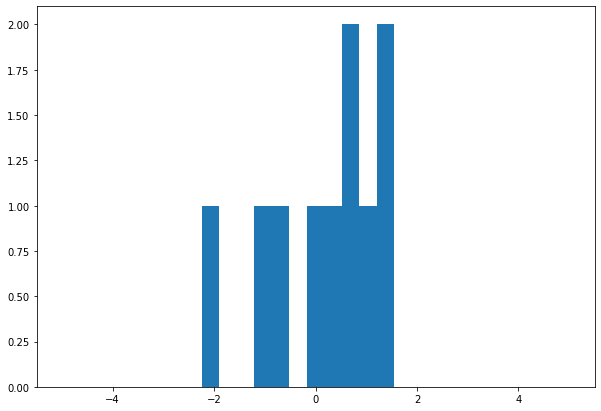

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
mu=0
sigma=1
a=np.random.normal(mu, sigma, 10)
#print(a)
fig, ax = plt.subplots(figsize =(10, 7))
bins=np.linspace(-5,5,30)
#print(bins)
ax.hist(a, bins )

 
# Show plot
plt.show()

In [ ]:
import numpy as np
from scipy import linalg

m = 4
n = 4

A = np.random.standard_exponential(size=(m,n))
A=np.array([[5,-10,-5],[2,14,2],[-4,-8,6]])

print(A)
lam, V = linalg.eig(A)
print("lam=",lam)
print("V=",V)
print(V.shape)
print("AxV=",A.dot(V))
print("lam.V=",lam*V)


[[  5 -10  -5]
 [  2  14   2]
 [ -4  -8   6]]
lam= [ 5.+0.j 10.+0.j 10.+0.j]
V= [[ 7.45355992e-01  7.44760246e-16 -5.22799043e-01]
 [-2.98142397e-01 -4.47213595e-01  5.75730417e-01]
 [ 5.96284794e-01  8.94427191e-01 -6.28661791e-01]]
(3, 3)
AxV= [[ 3.72677996e+00  5.66213743e-15 -5.22799043e+00]
 [-1.49071198e+00 -4.47213595e+00  5.75730417e+00]
 [ 2.98142397e+00  8.94427191e+00 -6.28661791e+00]]
lam.V= [[ 3.72677996e+00+0.j  7.44760246e-15+0.j -5.22799043e+00+0.j]
 [-1.49071198e+00+0.j -4.47213595e+00+0.j  5.75730417e+00+0.j]
 [ 2.98142397e+00+0.j  8.94427191e+00+0.j -6.28661791e+00+0.j]]


In [ ]:
print(A.dot(V))
print(lam * V )

[[ 0.20081142 -2.22703273]
 [-0.12410828 -3.60341465]]
[[ 0.20081142-0.j -2.22703273+0.j]
 [-0.12410828+0.j -3.60341465+0.j]]


In [ ]:
import numpy as np
from scipy import linalg

A=np.array([[3,1,1],[-1,3, 1]])
U, s, V = linalg.svd(A)
print(U)
print(s)
print(V)
print("multi U",U.shape, U.dot(U))
print("s=",s.shape,s)
print("multi V",V.shape, V.dot(V))
#print("A=", U.dot(s).dot(V))

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[3.46410162 3.16227766]
[[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [-8.94427191e-01  4.47213595e-01  5.26260748e-16]
 [-1.82574186e-01 -3.65148372e-01  9.12870929e-01]]
multi U (2, 2) [[ 1.00000000e+00 -1.33393446e-16]
 [-1.56386917e-16  1.00000000e+00]]
s= (2,) [3.46410162 3.16227766]
multi V (3, 3) [[ 0.97149901  0.11725616 -0.20601133]
 [-0.03485163  0.93029674  0.36514837]
 [ 0.23446756 -0.34756145  0.90786893]]
